<a href="https://colab.research.google.com/github/Raginii/Color-Concept-Associations-using-Google-Images/blob/master/AnalysisWithVaryingNumberOfImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of the best model by type of images used for training

In [1]:
# # ## Uncomment if using Google Colab and upload file dataTop50.xlsx
# from google.colab import drive
# drive.mount('/content/drive')

In [14]:
# Initialize these:
filePhoto1 = 'dataPhoto5.xlsx'
filePhoto2 = 'dataPhoto50.xlsx'
fileCartoon = 'dataCartoon50.xlsx'

path = "E:/GitRepo/Color-Concept-Associaitons-using-Google-Images/downloads"  # Modify this

# strtInd is used to keep track of beginning of the rows of a new category in the data matrix
# Copied from 01_getFeatures_photo_50.ipynb
strtInd1 = [0, 290, 580, 870, 1160, 1450, 1740, 2030, 2320, 2610, 2900, 3190, 3480]
strtInd= [0, 2900, 5800, 8700, 11600, 14500, 17400, 20300, 23200, 26100, 29000, 31900, 34800]

In [2]:
 # Include imports
import glob
from skimage.transform import resize
from skimage.io import imread, imsave, imshow
import os
import pandas as pd
import numpy as np
import skimage.color as skcolor
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
colNames = ["col_"+str(i) for i in range(58)] 
allConcepts = ['mango','watermelon','honeydew','cantaloupe','grapefruit','strawberry','raspberry','blueberry','avocado','orange','lime','lemon']

# Get the LAB coordinates of colors from file Lab.csv

colorData = pd.read_csv("Lab.csv",header=None)
colorDataRGB = pd.read_csv("RGB.csv",header=None)
sz = 100

#  Using the features obtained from best model in ErrCorrFrom3ModelsTop50

In [4]:
# Function to computer average error, correlation and rating for all test fruit category 
# based on the features selected from the best model (Spherical + Cylindrical + categorical)

        
def getErrCorr(startInd, X, y):
    xNew = np.column_stack([X,y])
    
    correlation = []
    error = []
    
    # Linear Regression using Cross Validation
    # Leave one out cross validation -- strtInd holds the starting indices of set of fruit data 
    for i in range(len(startInd)-1):
        xTemp = np.copy(xNew)
        # Leave one entire fruit group
        testFruit =  allConcepts[i]
        print("\nLeaving out fruit group : ",allConcepts[i])
        testTemp = np.copy(XX[strtInd[i]:strtInd[i+1],:]) # Get all rows from the LOO group
        trainTemp = np.delete(xTemp,range(startInd[i],startInd[i+1]),0)
        print(testTemp.shape, trainTemp.shape)
        row = len(trainTemp)
        #Training set
        X_train = np.column_stack([np.ones((row,1)), trainTemp[:,:-1]]) # add offset
        y_train = np.copy(trainTemp[:,-1])
        # Test set (hold out set)
        row2 = len(testTemp)
        X_test  = np.column_stack([np.ones((row2,1)), testTemp[:,:-1]]) #xTemp[row:tot,0:3]#
        y_test  = np.copy(testTemp[:,-1])


        # Create linear regression object
        regr = linear_model.LinearRegression(fit_intercept=False)
        # Train the model using the training sets
        regr.fit(X_train, y_train)

        # Make predictions using the testing set
        y_pred = regr.predict(X_test)

        ############## For test purposes - Average prediction over all Images of LOO group ############
        totalTestImages = y_pred.size/58  #58N rows -> every image has 58 rows of data
        avg_pred = [np.sum([y_pred[p] for p in range(q,y_pred.size,58)])/totalTestImages for q in range(58)]

        # For Pearson correlation coefficient and the p-value (between avg_pred and true rating for fruit group)
        trueRating = np.copy(y_test[0:58])

        sqErr = np.sum(pow(avg_pred - trueRating,2))
        print("The true squared error (in color ratings) for left out fruit",testFruit,"is: %.4f" % sqErr)

        corrCoeff, pVal = stats.pearsonr(avg_pred, trueRating)
        print("\nPearson’s correlation coefficient (between true ratings and avg predicted ratings) is %.4f" %corrCoeff)
        #print("p-value %.4f" %pVal)

        error.append(sqErr)
        correlation.append(corrCoeff)
        fig2 = plt.figure(figsize=(7,7))
        plt.scatter(trueRating,avg_pred,c=colorDataRGB.values,marker = 'o',linewidths=2.5)
        plt.ylabel('Predicted Ratings')
        plt.xlabel('Subject Ratings')
        plt.title('Scatter plot of color ratings for : %s' %testFruit)
        plt.axis('equal')
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.show()
    #return np.mean(error), np.mean(correlation)    
    return error, correlation, np.mean(error), np.mean(correlation)

## Prepare the datset to include Cartoon images

In [5]:
selFt = (54, 179, 180)

In [6]:
df = pd.read_excel(fileCartoon)
Q = df.as_matrix()
Q.shape

(34800, 187)

In [7]:
Xfull = np.copy(Q[:,selFt])
Yfull = np.copy(Q[:,-1])
print(Xfull.shape, Yfull.shape)
XX = np.column_stack([Xfull,Yfull])
print(XX.shape)

(34800, 3) (34800,)
(34800, 4)



Leaving out fruit group :  mango
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit mango is: 0.9448

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.7824


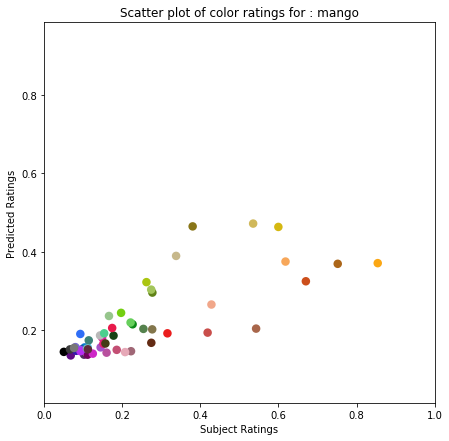


Leaving out fruit group :  watermelon
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit watermelon is: 1.4477

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.7178


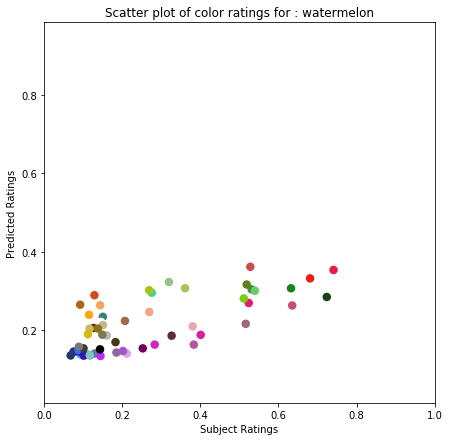


Leaving out fruit group :  honeydew
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit honeydew is: 0.4350

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.8307


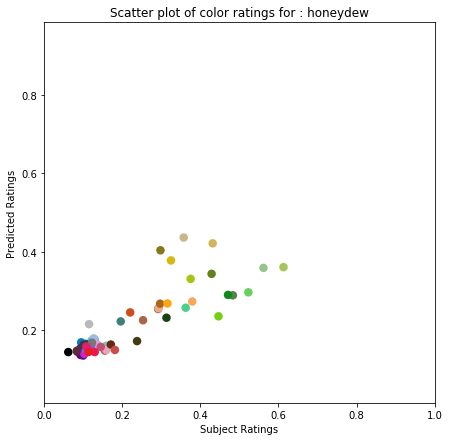


Leaving out fruit group :  cantaloupe
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit cantaloupe is: 0.8095

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.7962


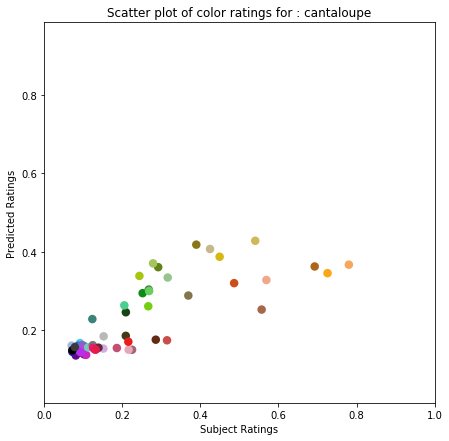


Leaving out fruit group :  grapefruit
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit grapefruit is: 0.8180

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.7386


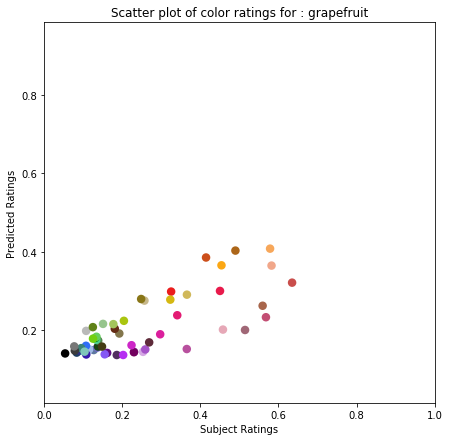


Leaving out fruit group :  strawberry
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit strawberry is: 0.9448

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.6636


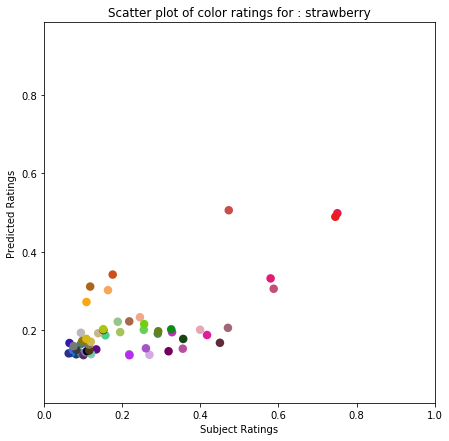


Leaving out fruit group :  raspberry
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit raspberry is: 0.8277

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.6435


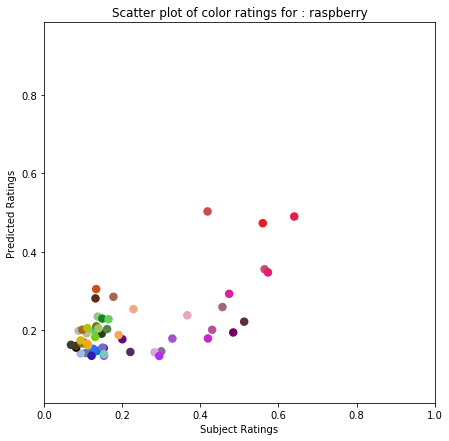


Leaving out fruit group :  blueberry
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit blueberry is: 0.7779

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.8841


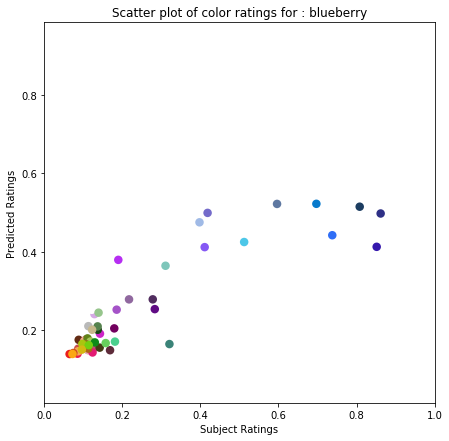


Leaving out fruit group :  avocado
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit avocado is: 0.9178

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.8012


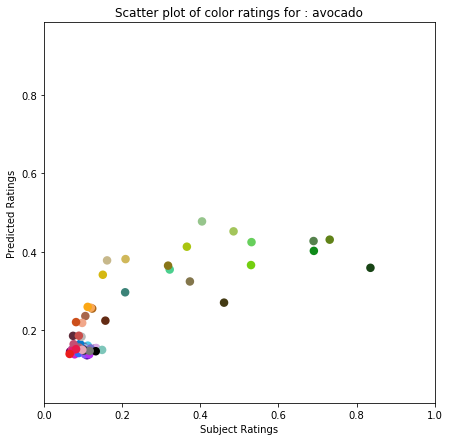


Leaving out fruit group :  orange
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit orange is: 0.5729

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.9041


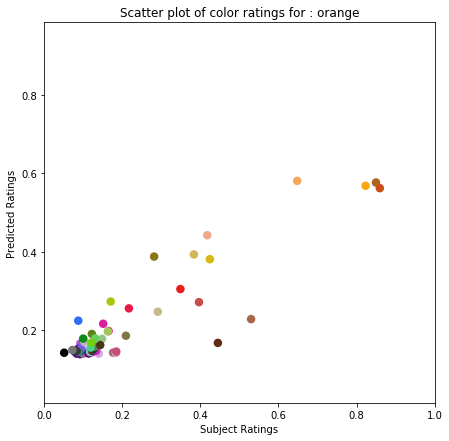


Leaving out fruit group :  lime
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit lime is: 0.5828

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.9271


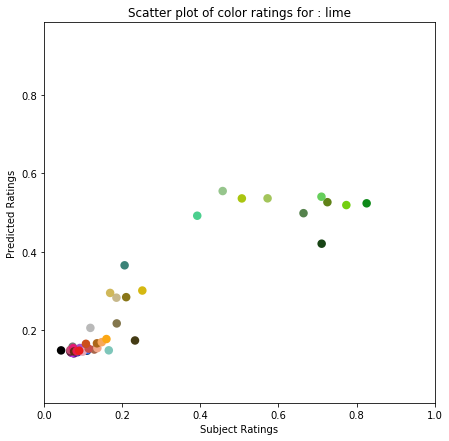


Leaving out fruit group :  lemon
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit lemon is: 0.3338

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.9254


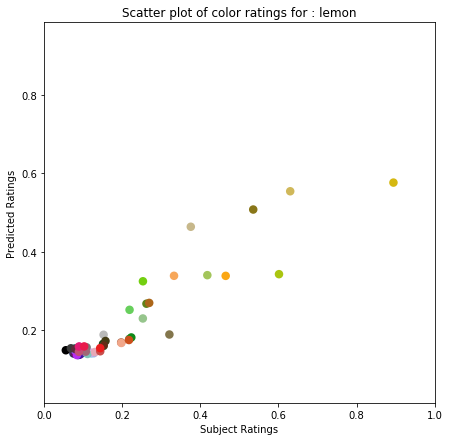


Leaving out fruit group :  mango
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit mango is: 0.9742

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.7815


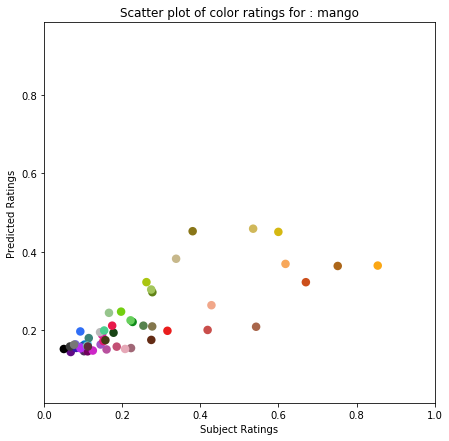


Leaving out fruit group :  watermelon
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit watermelon is: 1.4470

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.7146


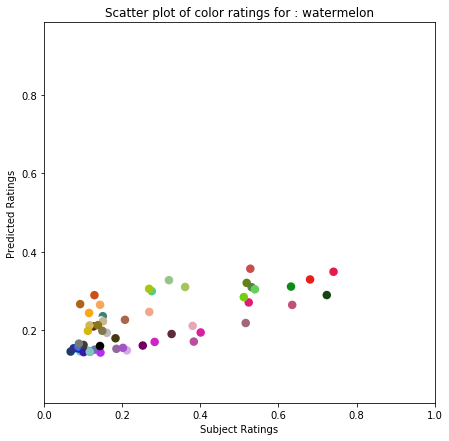


Leaving out fruit group :  honeydew
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit honeydew is: 0.4694

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.8252


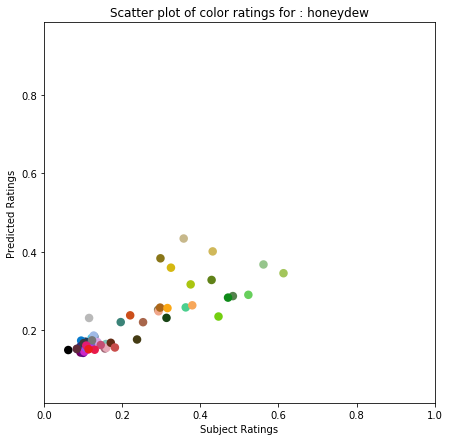


Leaving out fruit group :  cantaloupe
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit cantaloupe is: 0.8215

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.7942


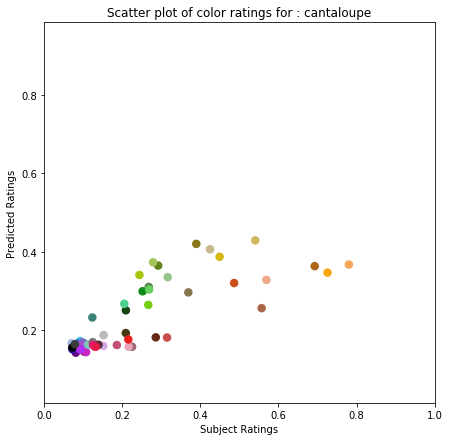


Leaving out fruit group :  grapefruit
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit grapefruit is: 0.7951

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.7415


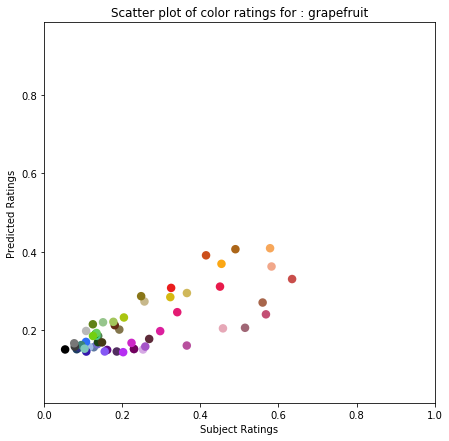


Leaving out fruit group :  strawberry
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit strawberry is: 0.9482

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.6657


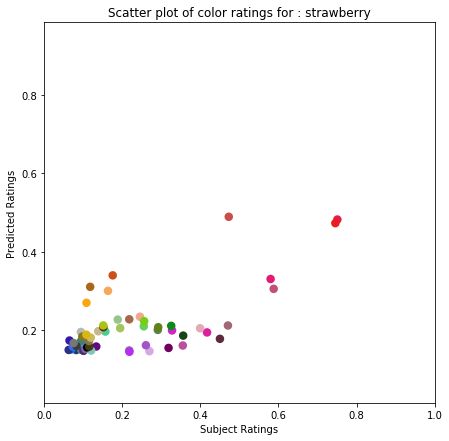


Leaving out fruit group :  raspberry
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit raspberry is: 0.8276

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.6467


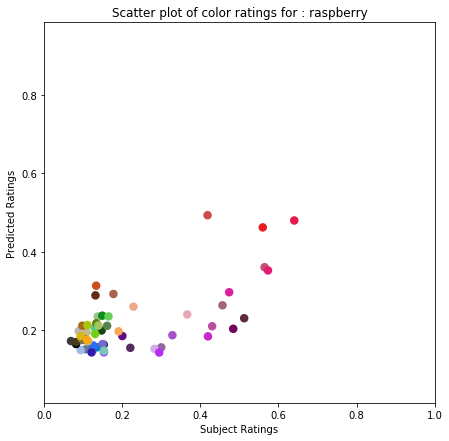


Leaving out fruit group :  blueberry
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit blueberry is: 0.8816

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.8837


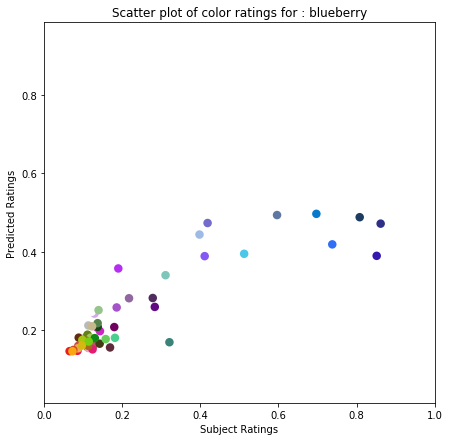


Leaving out fruit group :  avocado
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit avocado is: 0.9495

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.8082


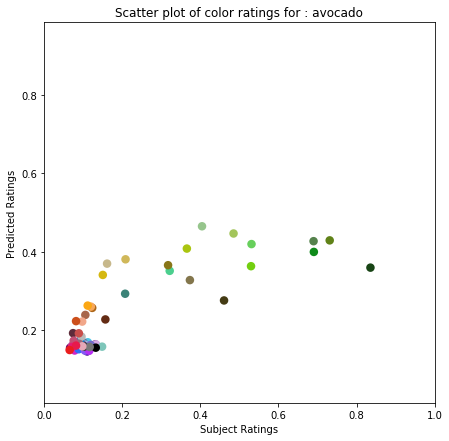


Leaving out fruit group :  orange
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit orange is: 0.6450

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.9041


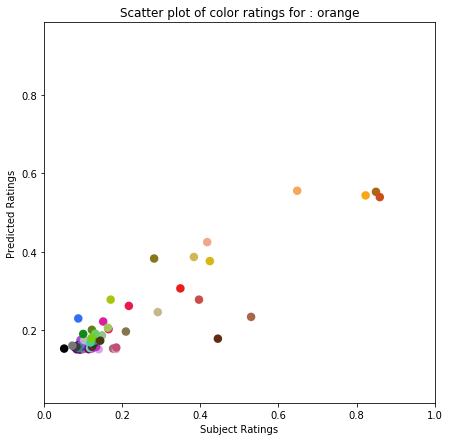


Leaving out fruit group :  lime
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit lime is: 0.6744

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.9265


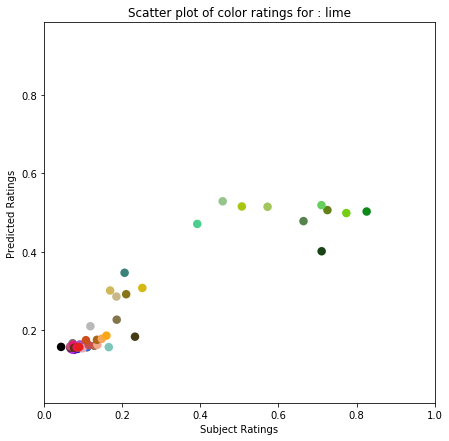


Leaving out fruit group :  lemon
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit lemon is: 0.3830

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.9271


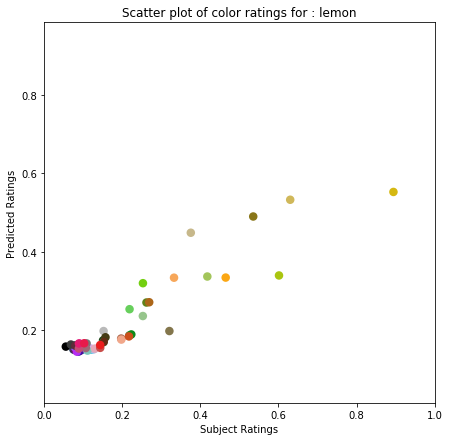

In [8]:
plt.close('all')
errC = []
corrC = []
n2 = [5, 50]
for i in n2:
    startInd = [0]
    X = np.empty((0,3), float)
    y = np.empty((0,), float)
    if i!=50:
        for t in range(len(strtInd)-1):
            X = np.r_[X, Xfull[strtInd[t]:strtInd[t+1]-(50-i)*58,:] ]
            y = np.r_[y, Yfull[strtInd[t]:strtInd[t+1]-(50-i)*58]]
            startInd.append(len(X))

    else:
        startInd = [i for i in strtInd]
        X = np.copy(Xfull)
        y = np.copy(Yfull)
        #   print(startInd)
        #   print(X.shape)
    e,c, _,_ = getErrCorr(startInd,X,y)
    errC.append(e)
    corrC.append(c)


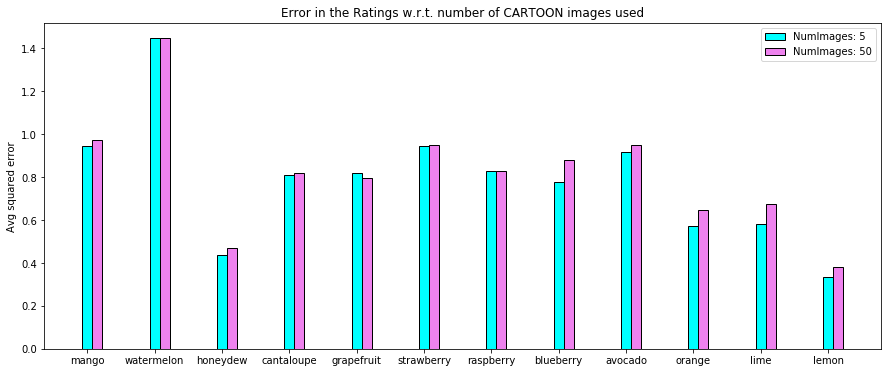

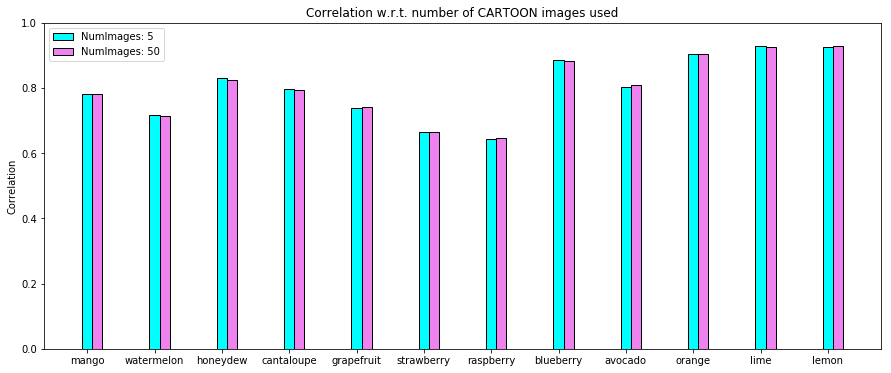

In [9]:
plt.close('all')
barWidth = 1.5
r1 = range(1,121,10)
r2 = [x + barWidth for x in r1]

fig = plt.figure(figsize=(15,6))
plt.bar(r1,errC[0],width = barWidth, color = 'cyan', edgecolor = 'black',label='NumImages: 5')
plt.bar(r2,errC[1],width = barWidth, color = 'violet', edgecolor = 'black',label='NumImages: 50')
plt.xticks(range(1,121,10),allConcepts)
plt.title("Error in the Ratings w.r.t. number of CARTOON images used")
plt.ylabel('Avg squared error')
plt.legend()

fig = plt.figure(figsize=(15,6))
plt.bar(r1,corrC[0],width = barWidth, color = 'cyan', edgecolor = 'black',label='NumImages: 5')
plt.bar(r2,corrC[1],width = barWidth, color = 'violet', edgecolor = 'black',label='NumImages: 50')
plt.xticks(range(1,121,10),allConcepts)
plt.title("Correlation w.r.t. number of CARTOON images used")
plt.ylabel('Correlation')
plt.legend()
plt.ylim(0,1)
plt.show()

## Prepare the datset to include photo images

In [10]:
selFt = (54, 179, 180)

In [11]:
# For 5 photo images

(3480, 187)
(34800, 187)
(34800, 3) (34800,)
(34800, 4)

Leaving out fruit group :  mango
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit mango is: 0.5869

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.9116


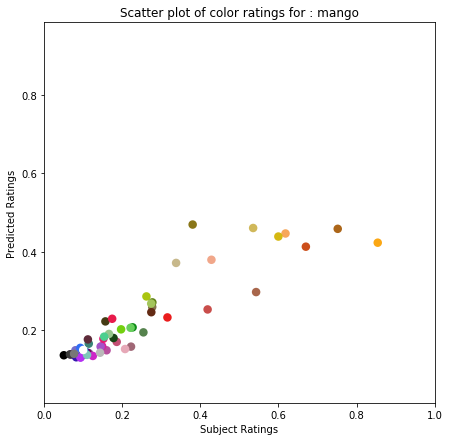


Leaving out fruit group :  watermelon
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit watermelon is: 1.4191

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.6543


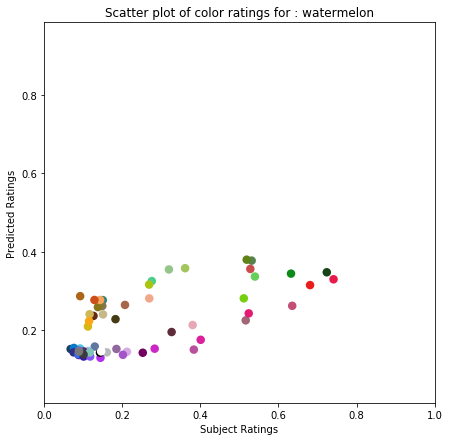


Leaving out fruit group :  honeydew
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit honeydew is: 0.2055

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.9139


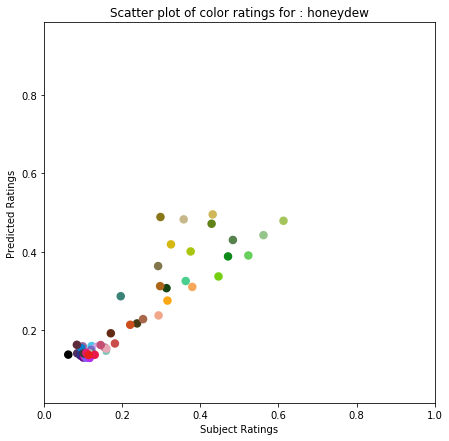


Leaving out fruit group :  cantaloupe
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit cantaloupe is: 0.3894

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.9380


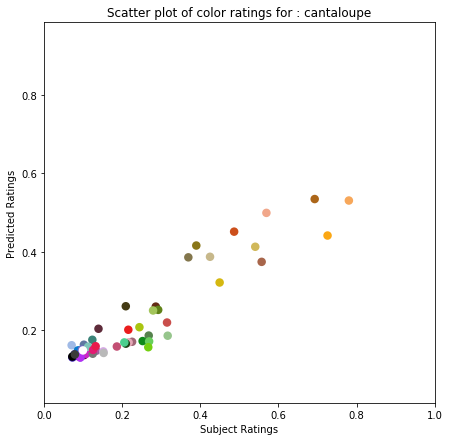


Leaving out fruit group :  grapefruit
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit grapefruit is: 0.6131

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.8249


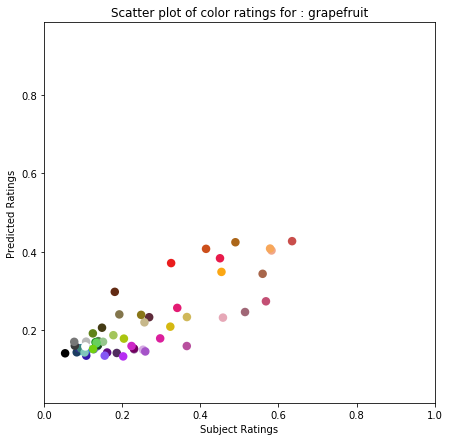


Leaving out fruit group :  strawberry
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit strawberry is: 0.9071

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.6734


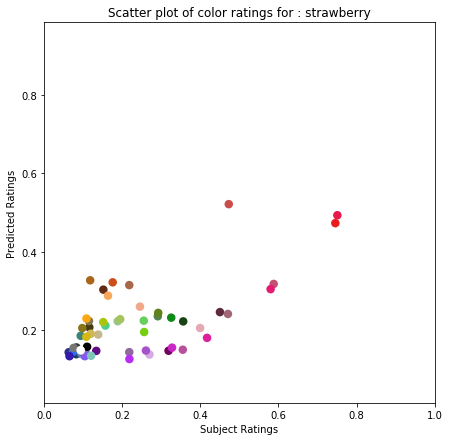


Leaving out fruit group :  raspberry
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit raspberry is: 0.8857

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.6001


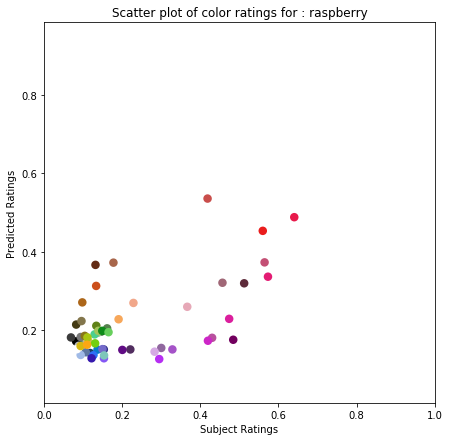


Leaving out fruit group :  blueberry
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit blueberry is: 1.1214

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.8498


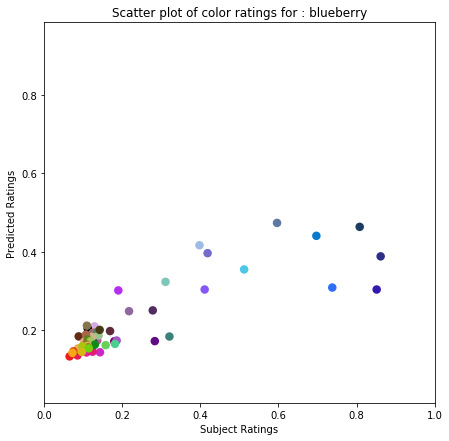


Leaving out fruit group :  avocado
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit avocado is: 1.0135

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.7608


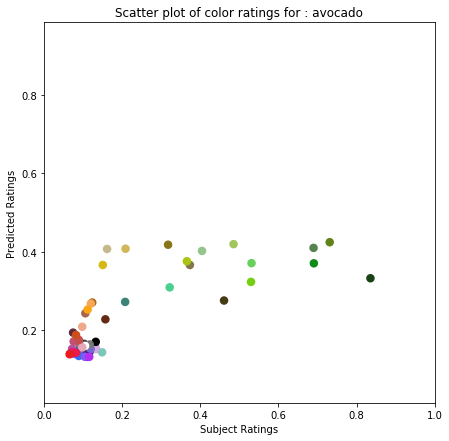


Leaving out fruit group :  orange
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit orange is: 0.4560

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.9448


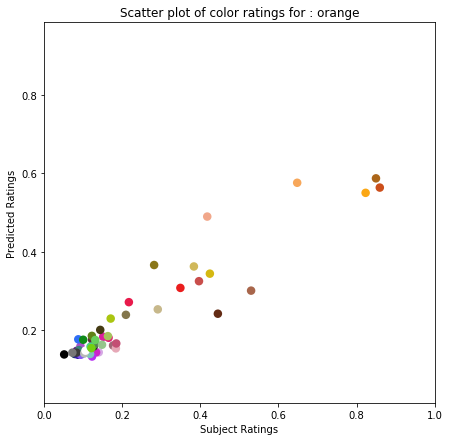


Leaving out fruit group :  lime
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit lime is: 1.1533

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.8259


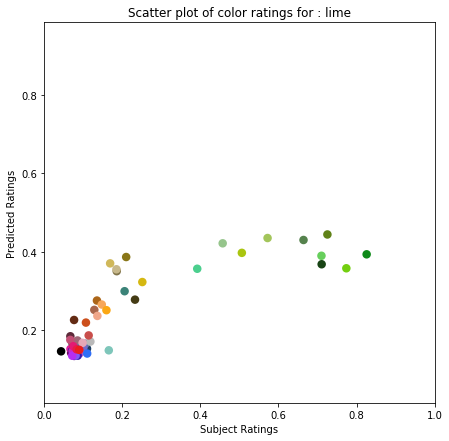


Leaving out fruit group :  lemon
(2900, 4) (3190, 4)
The true squared error (in color ratings) for left out fruit lemon is: 0.4784

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.8860


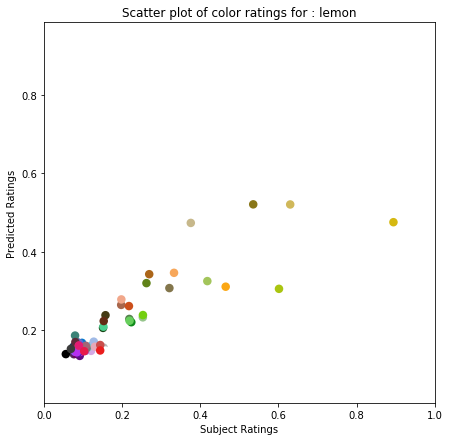


Leaving out fruit group :  mango
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit mango is: 0.6125

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.9157


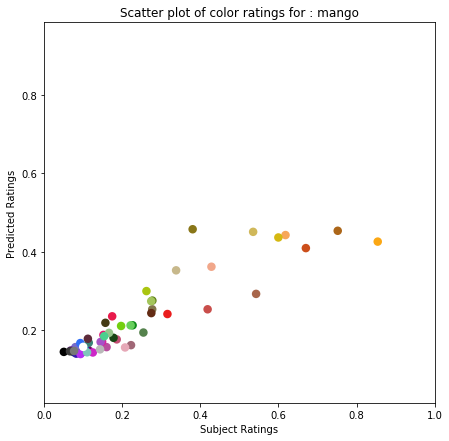


Leaving out fruit group :  watermelon
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit watermelon is: 1.4575

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.6506


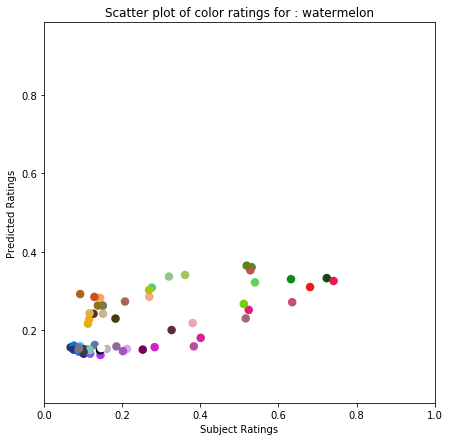


Leaving out fruit group :  honeydew
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit honeydew is: 0.2198

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.9138


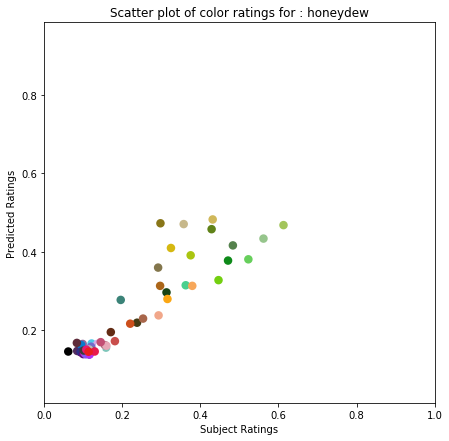


Leaving out fruit group :  cantaloupe
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit cantaloupe is: 0.4338

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.9369


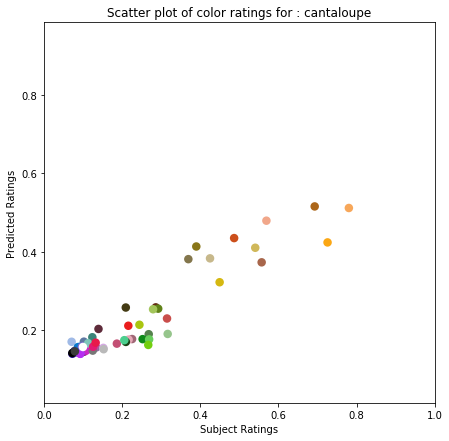


Leaving out fruit group :  grapefruit
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit grapefruit is: 0.6093

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.8329


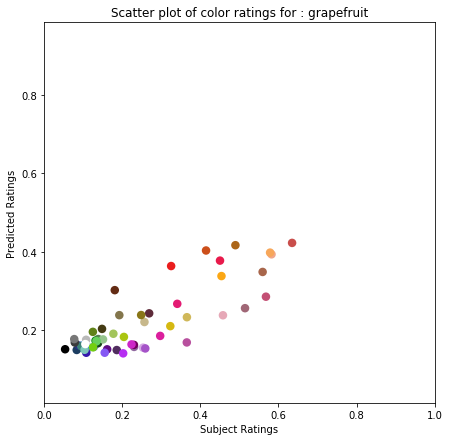


Leaving out fruit group :  strawberry
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit strawberry is: 0.9215

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.6708


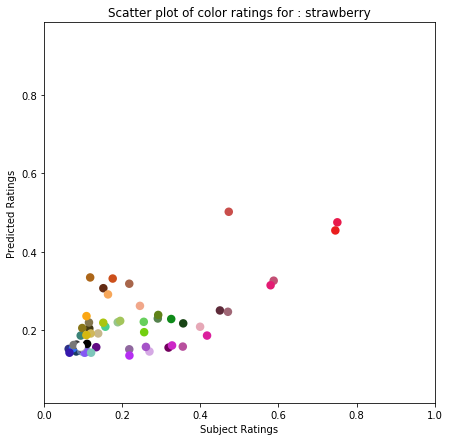


Leaving out fruit group :  raspberry
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit raspberry is: 0.8830

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.6022


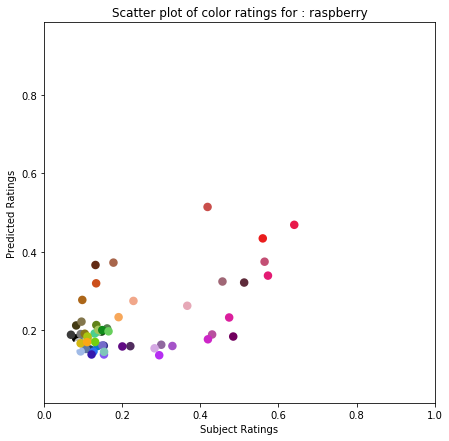


Leaving out fruit group :  blueberry
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit blueberry is: 1.2463

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.8400


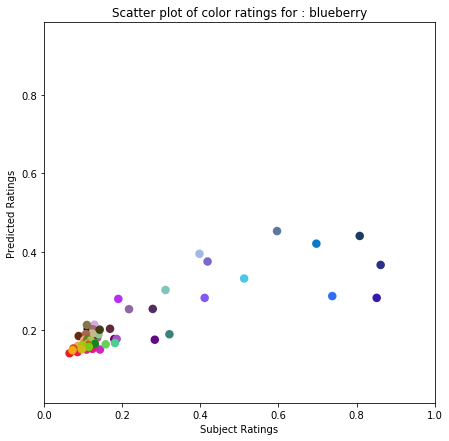


Leaving out fruit group :  avocado
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit avocado is: 1.0884

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.7480


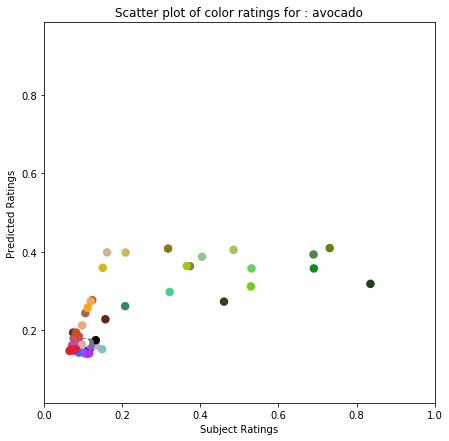


Leaving out fruit group :  orange
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit orange is: 0.5570

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.9426


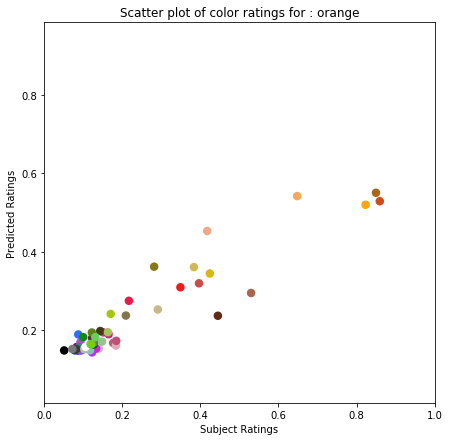


Leaving out fruit group :  lime
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit lime is: 1.2694

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.8080


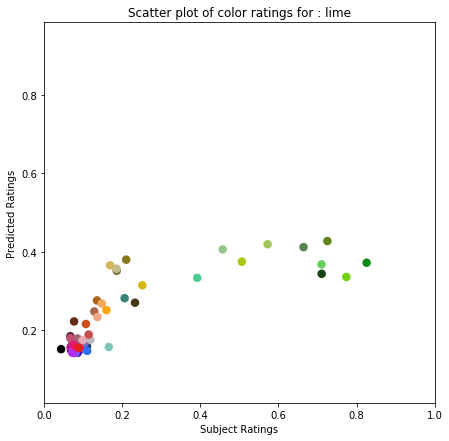


Leaving out fruit group :  lemon
(2900, 4) (31900, 4)
The true squared error (in color ratings) for left out fruit lemon is: 0.5188

Pearson’s correlation coefficient (between true ratings and avg predicted ratings) is 0.8904


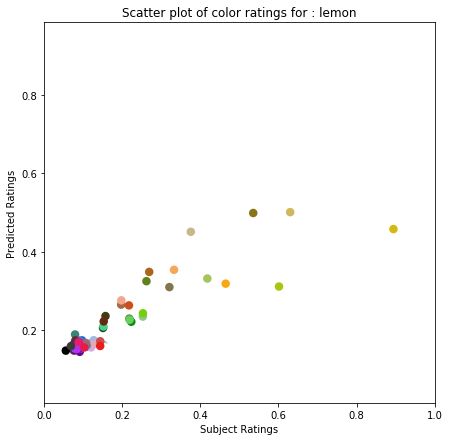

In [15]:
df5 = pd.read_excel(filePhoto1)
Q5 = df5.as_matrix()
print(Q5.shape)

df50 = pd.read_excel(filePhoto2)
Q50 = df50.as_matrix()
print(Q50.shape)

Xfull = np.copy(Q50[:,selFt])
Yfull = np.copy(Q50[:,-1])
print(Xfull.shape, Yfull.shape)

XX = np.column_stack([Xfull,Yfull])
print(XX.shape)

avgErr = []
avgCorr = []
err = []
corr = []
ee,cc, e,c = getErrCorr(strtInd1,Q5[:,selFt],Q5[:,-1]) # pass strtInd1
avgErr.append(e)
avgCorr.append(c)
err.append(ee)
corr.append(cc)

ee,cc, e,c = getErrCorr(strtInd,Xfull,Yfull)
avgErr.append(e)
avgCorr.append(c)
err.append(ee)
corr.append(cc)

In [17]:
print(avgErr)
print(avgCorr)

[0.7690993235685055, 0.8181126148135345]
[0.8152860647669159, 0.8126631229683176]


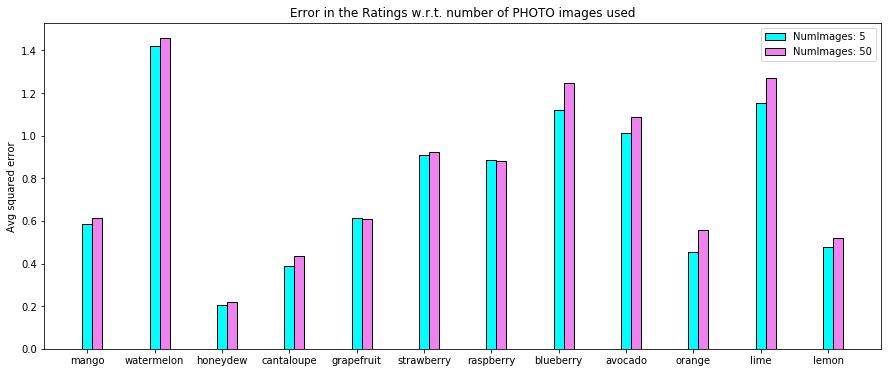

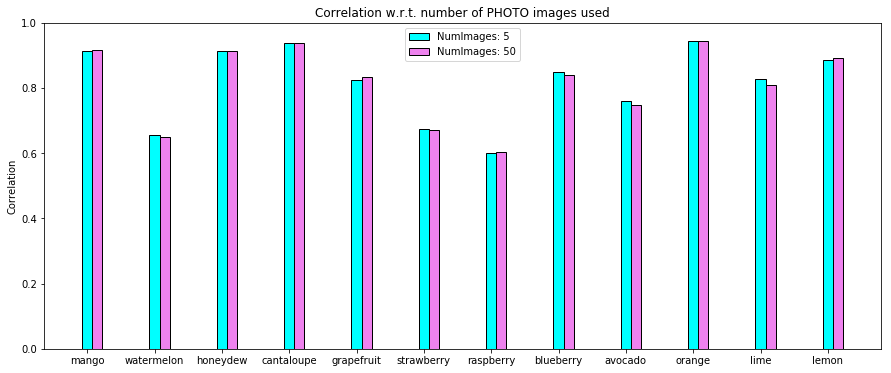

In [18]:
plt.close('all')
barWidth = 1.5
r1 = range(1,121,10)
r2 = [x + barWidth for x in r1]

fig = plt.figure(figsize=(15,6))
plt.bar(r1,err[0],width = barWidth, color = 'cyan', edgecolor = 'black',label='NumImages: 5')
plt.bar(r2,err[1],width = barWidth, color = 'violet', edgecolor = 'black',label='NumImages: 50')
plt.xticks(range(1,121,10),allConcepts)
plt.title("Error in the Ratings w.r.t. number of PHOTO images used")
plt.ylabel('Avg squared error')
plt.legend()

fig = plt.figure(figsize=(15,6))
plt.bar(r1,corr[0],width = barWidth, color = 'cyan', edgecolor = 'black',label='NumImages: 5')
plt.bar(r2,corr[1],width = barWidth, color = 'violet', edgecolor = 'black',label='NumImages: 50')
plt.xticks(range(1,121,10),allConcepts)
plt.title("Correlation w.r.t. number of PHOTO images used")
plt.ylabel('Correlation')
plt.legend()
plt.ylim(0,1)
plt.show()